# Regresión lineal con Python (Estimación de costos por modulo)


Lo que intentaremos obtener con nuestra regresión lineal es un ecuación de la forma
$$
y = mx + b
$$
y que se ajuste de mojor forma a nuestro datos.

Entonces tenemos
$$
m = \frac{\sum x \sum y - n\sum(xy)}{\left(\sum x\right)^2 -n \sum x^2} 
$$
y
$$
b = \overline{y} -m\overline{x}
$$


El coeficiente de correlación se calcula como:

$$
R = \frac{\sigma_{xy}}{\sigma_x \sigma_y}
$$

donde los terminos por separados los calculamos como:

$$
\sigma_x = \sqrt{\frac{\sum (x^2)}{n}-\overline{x}^2}, 
\sigma_y = \sqrt{\frac{\sum (y^2)}{n}-\overline{y}^2} 
$$

$$
\sigma_{xy} = \frac{\sum (x)}{n} - \overline{x} \cdot \overline{y}
$$

### Obtener la mejor regresión lineal para nuestro caso

Contexto: Como empresa nueva necesitamos obtener una estimación de cuanto cobran las demas empresas por la creación de un modulo en base a un nivel de dificultad de dicho modulo (La dificultad está definida en nuestra empresa por la cantidad de trabajadores que necesitamos para terminar el modulo dentro de 1 mes)

CASO: Obtendremos el precio de distintas empresas haciendo un estudio sobre los precios del mercado, donde obtendremos 7 precios de 4 empresas diferentes a las cuales les solicitamos un presupuesto por la cración del modulo en las distintas dificultades que estimamos en nuestra empresa.

In [50]:
#Data
x = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7]
#Los datos de Y se encuentran simplicados en 1000: 1200 = $1.200.000
y = [1200,920,1650,1150,1750,1300,2000,1400,2300,
1700,2503,2000,3000,2200,3575,2700,3700,2650,4287,
3300,4200,3100,4619,3900,5000,3700,5651,4700]
len(x),len(y)

(28, 28)

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
% matplotlib inline
% config InlineBackend.figure_format = 'svg'

In [53]:
n = len(x)
x = np.array(x)
y = np.array(y)
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx = sumx/n
promy = sumy/n

$$
m = \frac{\sum x \sum y - n\sum(xy)}{\left(\sum x\right)^2 -n \sum x^2} 
$$

In [54]:
m = (sumx*sumy - n*sumxy)/(sumx**2 - n*sumx2)

$$
b = \overline{y} -m\overline{x}
$$

In [55]:
b = (promy - m*promx) 

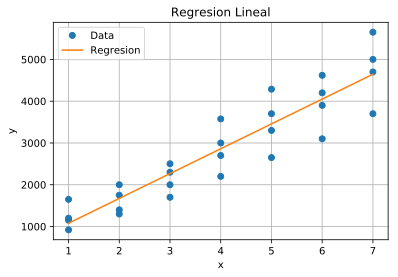

In [56]:
plt.plot(x,y,'o', label='Data')
plt.plot(x, m*x+b, label='Regresion')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Lineal')
plt.grid()
plt.legend()
plt.show()

In [57]:
#Multiplicamos por 1000 debido a que nuestros datos estaban simplicados.
m*1000, b*1000

(594330.35714285716, 485357.14285714313)

Por lo tanto nuestra ecuación para calcular el modulo mediante su dificultad y duración de 1 mes está definida por la siguiente ecuación:
$$
y = 594330x + 485357
$$

Ejemplo un modulo de dificultad 3 tendria un precio de:

In [58]:
y = 594330*3 + 485357
y

2268347

El modulo tendria un precio de $2.268.347 CLP

#### Calculamos el coeficiente de correlación

Para calcular el coeficiente de correlación seguimos las reglas:

$$
\sigma_x = \sqrt{\frac{\sum (x^2)}{n}-\overline{x}^2}, 
\sigma_y = \sqrt{\frac{\sum (y^2)}{n}-\overline{y}^2} 
$$
$$
\sigma_{xy} = \frac{\sum (x)}{n} - \overline{x} \cdot \overline{y}
$$

$$
R = \frac{\sigma_{xy}}{\sigma_x \sigma_y}
$$

In [62]:
sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx * promy

R = sigmaxy/(sigmax*sigmay)
R2 = R**2
R2

0.85204475431572024